<a href="#"><img src="https://github.com/matheusbuniotto/portifolio/blob/main/logo_vertical.png?raw=true" width='210' alt="AVATAR" border="0"></a>

#### **Data Science na Prática**
#### *Projeto - 01*
*por Matheus Buniotto*

---

# Análise dos Dados do Airbnb - *Roma*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2019, a Startup fundada 13 anos atrás, já havia **hospedado mais de 500 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

*Neste notebook*, iremos analisar os dados referentes à cidade de Roma, e ver quais insights podem ser extraídos a partir de dados brutos.

##**A cidade de Roma**
<a href="#"><img src="https://i.ibb.co/Ydk7sgj/roma.jpg" alt="roma" border="0" align="left"></a>


Fundada em 753 a.C., a cidade de Roma, é um dos destinos turísticos mais importantes do mundo na atualidade. Graças à sua grande riqueza histórica e cultural visitantes do mundo visitam e se hospedam na cidade. No ano de 2019, cerca de **13,4% do PBI** da cidade era proveniente do setor turístico e a perspectiva é que este número contínue crescendo. 

Nesse estudos, tentaremos enteder como o aplicativo **Airbnb** se insere na oferta de leitos e hospedagem na cidade italiana.

## Obtenção dos Dados

Os dados utilizados nessa análise foram obtidos através do site [Inside Airbnb](https://insideairbnb.com), um projeto independente e não comercial, que possuí um conjunto de ferramentas e dados que permitem que você explore como o Airbnb está realmente sendo usado em cidades ao redor do mundo.

*Para essa análise exploratória, utilizaremos o arquivo: Listing.csv - Summary information and metrics for listings in Rome (good for visualisations).*




In [2]:
# pacotes para wordcloud
!pip install wordcloud -q
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/italy/lazio/rome/2020-12-17/visualisations/listings.csv')

## Análise dos Dados


Primeiramente devemos entender os dados com que iremos trabalhar, quais seus nomes, valores, o que representam e como são representados no nosso conjunto de dados. 

*Abaixo podemos verificar o Dicionário das variáveis, dessa forma podemos entender de forma sumarizada e com mais ***clareza*** as variáveis apresentadas.*


**Dicionário das variáveis**

* `id` = a chave que identifica cada entrada em nosso dataset
* `name` = nome fantasia do imóvel
* `host_name` = nome do anfitrião
* `neighbourhood_group` = coluna sem valores 
* `neighbourhood` = none do bairro
* `latitude` = latitude do imóvel
* `longitud`e = longitude do imóvel
* `room_type` = tipo de quarto oferecido para hospedagem
* `price` = preço cobrado para hospedagem
* `minimun_nights` = mínimo de noites
* `number_of_reviews` = quantidade de avaliações 
* `last_review` = data da última avaliação
* `reviews_per_month` = número de avaliações por mês
* `calculated_host_listing_count` = quantidade de imóveis do mesmo anfitrião
* `availability_365` = quantidade de dias disponíveis para hospedagem dentro do período de 365 dias



---



Antes de iniciar qualquer análise, vamos verificar a cara do nosso conjunto de dados, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,21,7,7,2015-05-28,0.10,5,365
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,37,1,55,2017-10-31,0.37,3,365
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,94,3,17,2018-10-01,0.14,7,365
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,90,2,142,2020-01-03,1.21,1,364
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,73,2,40,2020-11-22,0.32,2,319


**Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nosso conjunto de dados possui 28151 entradas(linhas) e 16 variávies (definidas por colunas). Podemos ver os nomes e os tipos de cada uma, facilitando a busca por possíveis erros e problemas que possam ser encontrados devido a incompatibilidade de formatos.

---


* id                         :         int64

* name                     :          object

* host_id                      :       int64

* host_name                   :       object

* neighbourhood_group            :   float64

* neighbourhood                  :    object

* latitude                      :    float64

* longitude                    :     float64

* room_type                   :       object

* price                          :     int64

* minimum_nights                :      int64

* number_of_reviews             :      int64

* last_review                  :      object

* reviews_per_month            :     float64

* calculated_host_listings_count   :   int64

* availability_365    :                int64




In [6]:
# identificar o volume de dados do DataFrame
print(df.shape)
print('Entradas:\t{}'.format(df.shape[0])) # -> Chamamos a função print deixando espaço para ser completa com a função shape, selecionando as linhas através do [0]
print('Variáveis:\t{}'.format(df.shape[1])) # -> Usamos a mesma função, porém com o index [1], pare retornar o número de colunas no dataset


(28151, 16)
Entradas:	28151
Variáveis:	16


### **Valores ausentes no *conjunto de dados***

Um dos maiores problemas enfretados quando trabalhamos com dados é a sua qualidade. Nessa etapa verificaremos se há valores ausentes, os quais poderão impactar futuramente em nossa análise.





In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.226706
last_review                       0.226706
host_name                         0.000391
name                              0.000249
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Através deste simples código, podemos verificar a porcentagem de cada variável ausente no nosso conjunto de dados. A variável ***neighbourhood_group*** apresenta 100% de valores ausentes, logo após ela, vemos que as váriaveis relacionadas às ***"reviews"*** apresentam cerca de 22% de valores ausentes. 

### **Vamos verificar a distribuição das variáveis?** 

Vamos verificar através de gráficos de **histograma** a distribuição das variáveis numéricas da nosso conjunto de dados. Além de nos ajudar como uma análise preliminar dos dados, através dos histogramas podemos detectar algumas ***anomalias*** evidentes em nossos dados. 

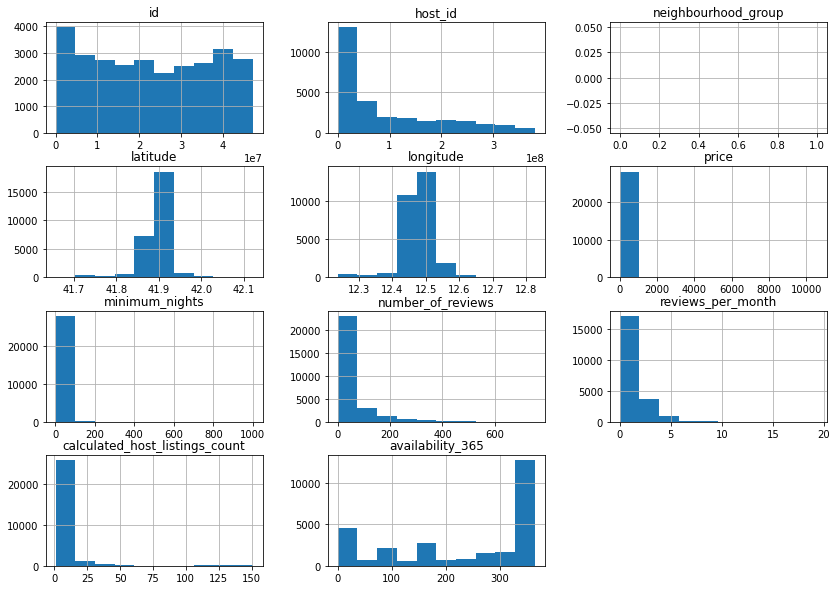

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(14,10));

🚨**Anomalias detectadas**🚨
Podemos detectar através de uma investigação superficial dos dados que existem claras anomalias em nossos dados. Vamos ver algumas?

* O mínimo de **noites possui** valores que passam de 1000 noites
* Na variável **preços**, há alguns valores que superam 10000 EUR, por noite!

Essas anomalias são evidentes, nas próximas etapas trataremos essas anomalias para que não interfiram em nossa análise.

### **E a média dos preços de aluguel?**

💵 Agora, já sabemos que o variável *prices* possui algumas anomalias evidentes, vamos investigar melhor?

In [9]:
# ver a média da coluna `price`
print(df['price'].describe())
print ('')
print('A média dos preços é:\t{}'.format(df['price'].mean()))


count    28151.000000
mean       108.706760
std        322.280649
min          0.000000
25%         48.000000
50%         70.000000
75%        104.000000
max      10571.000000
Name: price, dtype: float64

A média dos preços é:	108.70675997300273


🔍 Agora já sabemos a **média e a distribuição** dos preços para as hospedagens do Airbnb em Roma. Além disso, vemos que o valor máximo da variável *'prices'* chega a 10571, o que claramente nos indica ao menos um **outlier**.

## **Lidando com os problemas...**




Sabendo que nosso conjunto de dados apresenta alguns **problemas**, precisamos lidar com eles para que nossa análise possa continuar de forma mais clara e menos enviesada possível. 

Primeiramente, vamos remover os *outlier* das variáveis prices e minimun_nights. Utilizando um gráfico de "Box Plot"*.


**O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers.*

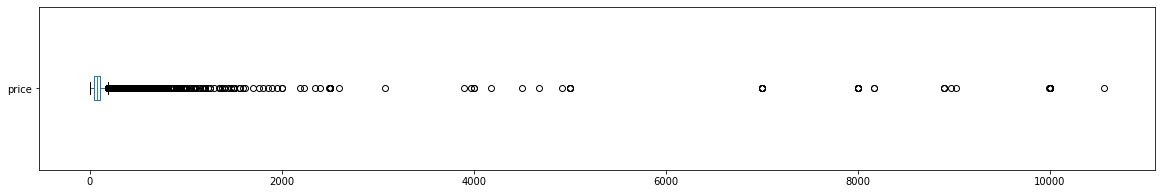

990 entradas
3.19%


In [10]:
#decteção de outliers
df.price.plot(kind='box', vert=False, figsize=(20, 3),)
plt.show()

#verificar quantidade de prices acima ou igual a `x`
x = 300
print("{} entradas".format(len(df[df.price >= x])))
print('{:.2f}%'.format((len(df[df.price > x]) / df.shape[0])*100))

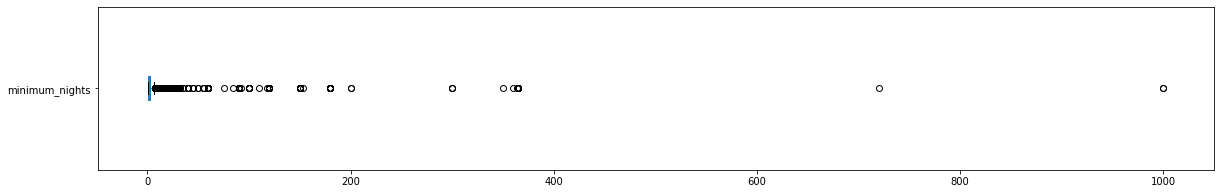

1973 entradas
5.29%


In [11]:
#decteção de outliers
df.minimum_nights.plot(kind='box', vert=False, figsize=(20, 3),)
plt.show()

#verificar quantidade de minimun-nights acima ou igual a `y`
y = 5
print("{} entradas".format(len(df[df.minimum_nights >= y])))
print('{:.2f}%'.format((len(df[df.minimum_nights > y]) / df.shape[0])*100))

🧼 Agora que já temos uma visão mais clara, vamos limpar os dados das variáveis. Vamos criar uma cópia do nosso conjunto de dados para que possamos manter o antigo como backup.

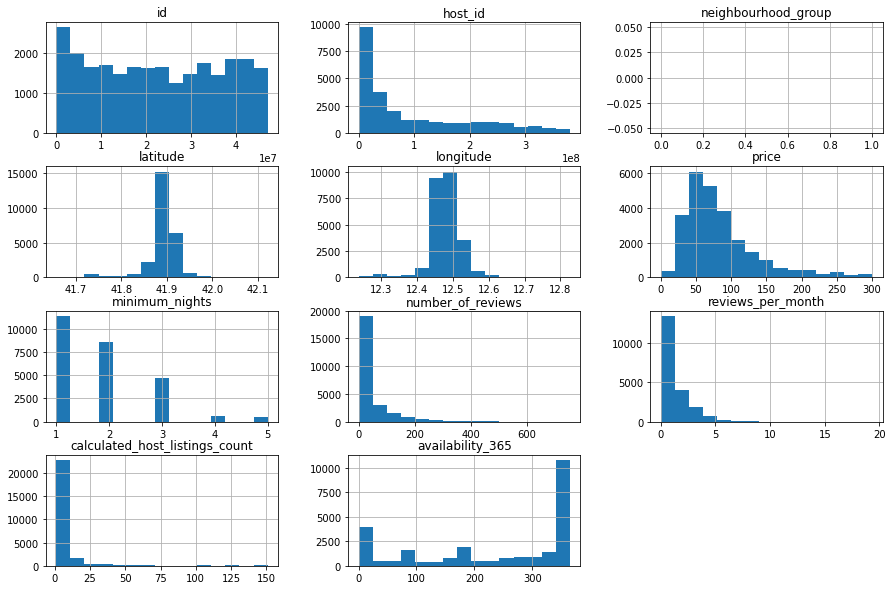

In [50]:
#limpeza dos dados de price
#copiamos os dados do df para o novo dataset
df_clean = df.copy()

#remover os preços acima de x definido acima
df_clean.drop(df_clean[df_clean.price > x].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > y].index, axis=0, inplace=True)

#verificar como ficaram a distribuição de preços
df_clean.hist(bins=15, figsize=(15,10));

Após os tratamentos e a  limpeza da variável 'prices' e 'minimun_nights', vemos que a distribuição apresenta valores mais próximos ao que veriamos na realidade.


### **Existe correlação entre as variáveis**

Alguns conjuntos de dados apresentam uma forte correlação entre as variáveis, o que pode nos trazes insighs preciosos. Vamos verificar se há alguma correlação entre as variáveis do conjunto de dados.

In [13]:
#matriz de correlação
corr = df[['price','minimum_nights', 'neighbourhood', 'calculated_host_listings_count', 'number_of_reviews','availability_365' ]].corr()

#mostrar a matriz de correlação
display(corr)


,price,minimum_nights,calculated_host_listings_count,number_of_reviews,availability_365
price,1.000000,-0.007318,0.023995,-0.039515,0.004553
minimum_nights,-0.007318,1.000000,-0.017786,-0.024017,0.001404
calculated_host_listings_count,0.023995,-0.017786,1.000000,-0.049145,-0.041019
number_of_reviews,-0.039515,-0.024017,-0.049145,1.000000,0.025435
availability_365,0.004553,0.001404,-0.041019,0.025435,1.000000


Através de um Heatmap🔥 podemos vizualisar melhor a disposição das correlação. Lembrando que um coeficiente de correlação próximo de zero indica que não há relação entre as duas variáveis, e quanto mais eles se aproximam de 1 ou  -1, mais forte é a relação.

Em nosso conjunto de dados não há nenhuma correlação clara entre as variáveis.

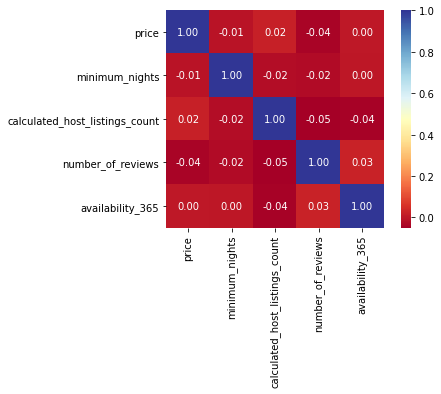

In [14]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdYlBu', fmt='.2f', square=True, linecolor='white', annot=True);

**Qual o tipo de imóvel mais alugado no Airbnb?**

No Airbnb é possível encontrar diversas modalidades de quartos para hospedagem, você pode optar por casas ou apartamentos inteiros, só para você, ou até mesmo quartos compartilhados com outros viajantes.


Vamos ver como essa proporção de oferta de tipos de quartos na cidade de Roma.

In [15]:
#quantidade de cada tipo de imóvel disponível
df[['room_type', 'id']].groupby('room_type').count()

,id
room_type,
Entire home/apt,17702
Hotel room,1294
Private room,8960
Shared room,195


In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df[['room_type', 'id']].groupby('room_type').count() / df.shape[0]).sort_values(by='id', ascending=False)

,id
room_type,
Entire home/apt,0.628823
Private room,0.318284
Hotel room,0.045966
Shared room,0.006927


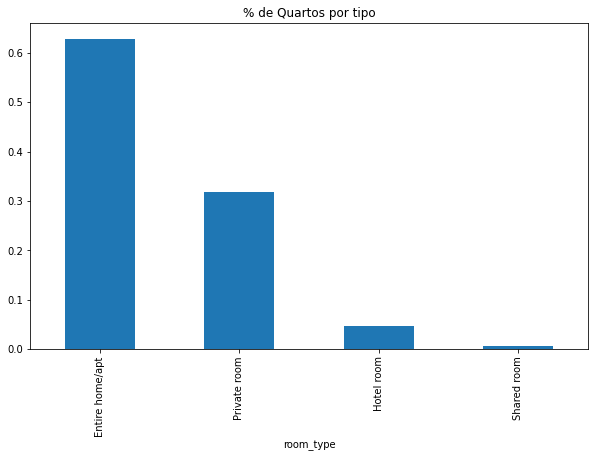

In [62]:
(df[['room_type', 'id']].groupby('room_type').count() / df.shape[0]).sort_values(by='id', ascending=False).plot.bar(legend=False, figsize=(10,6), title='% de Quartos por tipo');

Casas e apartamentos representam **62,8%** da oferta de leitos, seguidos por Quartos privados com **31,8%**, em terceiro lugar, vemos os quartos de hotéis com **4,5%** e em último lugar estão os quartos compartilhados.

Levando em conta as [informações demográficas](https://www.statista.com/statistics/704970/numbre-of-trips-by-age-and-gender-of-tourist-italy/) dos visitantes de Roma, essa disposição de tipos de quartos acompanha as preferências da maioria dos visitantes da cidade.


---



### **Qual a localidade mais cara?**



Vamos análisar qual o bairro oferece a média de diária mais alta na cidade.

In [17]:
# ver preços por bairros, na média
(df_clean[['neighbourhood', 'price']].groupby('neighbourhood').mean()).sort_values(by='price', ascending=False)

,price
neighbourhood,
I Centro Storico,95.302609
XV Cassia/Flaminia,79.925170
XIII Aurelia,78.235150
II Parioli/Nomentano,75.036476
IX Eur,73.200658
XII Monte Verde,71.606209
XIV Monte Mario,68.871456
X Ostia/Acilia,66.162988
VII San Giovanni/Cinecittà,65.331800


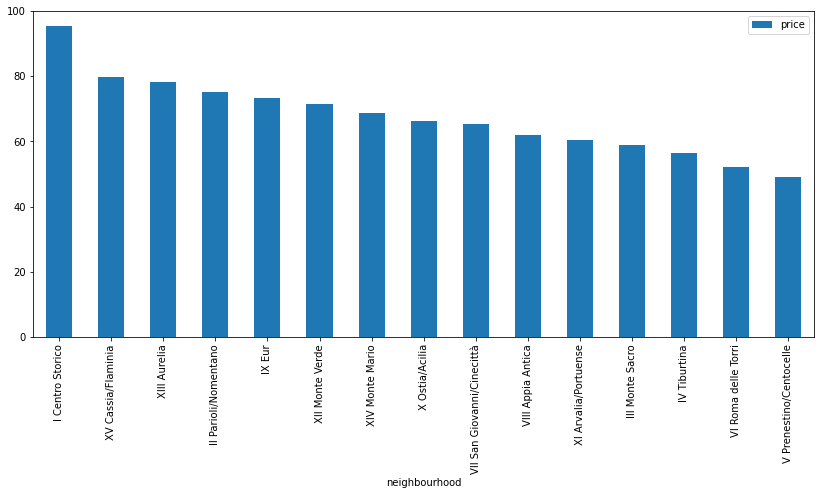

In [39]:
(df_clean[['neighbourhood', 'price']].groupby('neighbourhood').mean()).sort_values(by='price', ascending=False).plot(
    kind='bar', figsize=(14,6));

O Centro Histórico da cidade apresenta o valor mais elevado para diárias (em média), o Centro Histórico é onde se encontram a maioria dos atrativos turísticos de Roma, portanto, podemos inferir que os dados apontam a direção correta. Seguindo o mesmo raciocínio, faz sentido que a maioria dos imóveis estejam localizados mais próximos ao centro da cidade. 

Vamos análisar a disposição das imóveis na cidade através de sua latidude/longitude em relação ao seu preço.

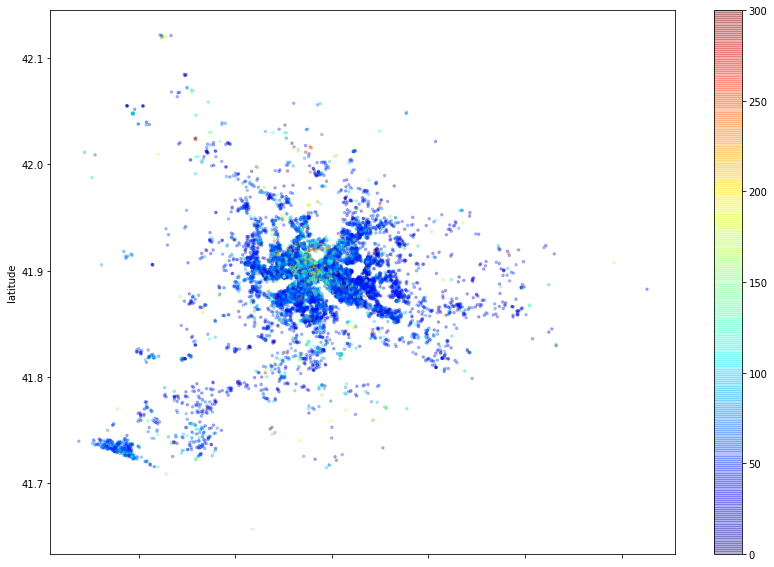

In [18]:
# plotar imóveis pela latitude-longitude, agora com a correção nos preços.
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c=df_clean['price'], s=6, cmap=plt.get_cmap('jet'), figsize=(14,10));

O mapa de disposição nos mostra que a grande maioria dos imóveis está agrupada ao redor do centro da cidade, onde se encontram a maioria dos atrativos turísticos da cidade. Vejamos abaixo o mapa real da cidade e como essa disposição se compara com o mapa real da cidade.



<a href="#"><img src="https://i.ibb.co/Tr7jpRr/mapa.png" alt="mapa" border="0" align="left"></a>

## **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [19]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

1.840216970166602

Após realizar a limpeza dos outliers da variável "minimun_nights", vemos que em média os anfitriões oferem leitos com no mínimo 1.86 diárias.

## **Wordcloud de descrições dos imóveis no Airbnb**

Para essa análise vamos utilizar o conjunto de dados mais completo disponível no [InsideAirbnb](http://insideairbnb.com), porém, só usaremos as entradas na variável de descrição.

In [20]:
df_cloud = pd.read_csv('https://dl.dropboxusercontent.com/s/bte4wpt0zzenbs3/listings-full.csv?dl=0')
df_cloud.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [21]:
#remover as entradas em branco de descrição
descr = df_cloud.dropna(subset=['description'], axis=0)['description']


Vamos ver um exemplo de como essas entradas de descrição estão no conjunto de dados.

In [22]:
# exemplos de descrições para os imóveis no Airbnb
display(descr.iloc[10])
print ('')


"Bright and quiet, two bedrooms, 3 Floor with elevator<br />Fully at your disposal for your privacy and all the comfort of an apartment in the center of Rome.<br />ONLY 5 MINUTES ON FOOT from the Basilica of St. Peter, IN FRONT of the Vatican Museums and a short walk from all the tourist sites of Rome<br />DISTANCES ON FOOT<br />Vatican Museums 3 min<br />Basilica of St. Peter 5 min<br />Castel S.Angelo 5 min<br />Piazza Navona 15 min<br />Campo dei Fiori 15 min<br />Piazza di Spagna 20 min<br />Trastevere 20 min<br />Colosseum 20 mins<br /><br /><b>The space</b><br />Lovely bright 2 bedroom apartment at only 5 MINUTES WALK TO S.Peter’s Basilica.<br /><br />At the same price of a B&B room you’ll have a whole apartment for your comfort and privacy.<br /><br />The building is in front of Vatican ’s Museums entrance, Castel S.Angelo is at 10 minutes' walk, Spanish Steps at 20 m. walk.<br /><br />The apartment is so central within walking distance to the most important touristic points in 

Para conseguir criar uma nuvem de palavras eu preciso juntar todas elas em um único texto. 

In [23]:
# concatenar as palavras
all_descr = " ".join(d for d in descr)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_descr)))


Quantidade de Palavras: 20916036


Agora, precisamos criar algumas **StopWords**, palavras que não deverão ser contabilizadas em nossa nuvem de palava, por não agregarem nenhum tipo de informação. Alguns exemplos são "a", "não", "mas", "and", "I", "not", "de" entre outras. 

In [24]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["<br />", "<br>", "<b>", "</b>", "br", "di", "un"])

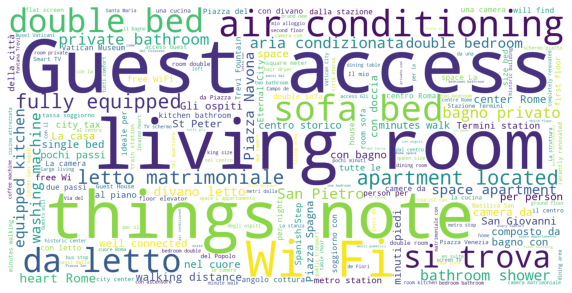

In [25]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(all_descr)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

Agora, vamos utilizar nossa linda nuvem de imagens e criar algo ainda mais legal, vamos usalas para recriar um dos atrativos turísticos mais icônicos de Roma, o Coliseu.

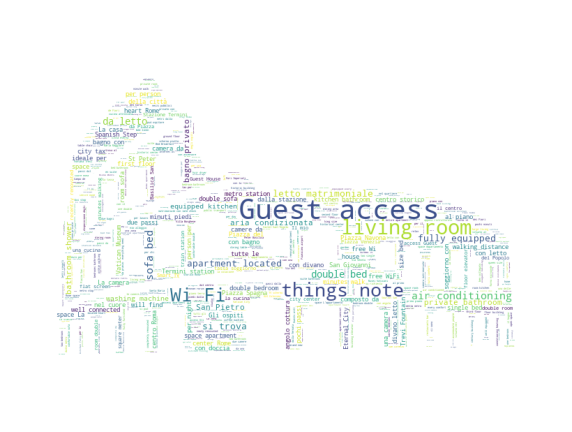

In [54]:
coliseo_mask = np.array(Image.open("/content/coliseu.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=1000,
                      mask=coliseo_mask, max_font_size=400,
                      min_font_size=1).generate(all_descr)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

## Conclusões


Através dessa análise exploratória desenvolvida podemos constatar que mesmo se tratando de um conjunto de dados pré-processado e "simplificado", o conjunto apresenta valores ausentes e outliers que necessitam ser tratados e limpos para que uma conclusão precisa fosse possível.  

Após essa limpeza, conseguimos tirar alguns **insighs** através da análise desenvolvida até aqui. Podemos ver que não há uma correlação clara entre as variáveis e o preço cobrado pelo anfitrião. Conseguimos também avaliar qual o tipo de quarto é o que possui maior oferta e qual a quantidade mínima de noites, em média, é ofertada aos visitantes da cidade. 

Também analisamos os bairros mais caros e a distribuição dos imóveis no território da cidade italiana e a correlação entre a localização dos atrativos turísticos da cidade, o valor da diária e a localização da oferta de leitos.

Com essa análise conseguimos ter uma visão mais clara sobre a oferta de leitos do airbnb no cenário da cidade italiana de Roma. 

*Obrigado.*

